In [1]:
%matplotlib widget  
import numpy as np
import bmcs_utils.api as bu
from bmcs_cross_section.api import ReinfLayer
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
ce = CrackPropagation(n_seg=200) #250
ce.sz_bd.Rectangle = True
ce.sz_bd.matrix='advanced'
# ce.sz_cto.crack_tip_shear_stress = 'global'
ce.sz_bd.matrix_.trait_set(f_t = 0.3 * 38 **(2/3), f_c = 38, d_a = 8, E_c = 28000, L_fps = 3, interlock_factor = 1) 


ce.sz_bd.trait_set(H=350, B=320, L=1395)#(H=600, B=250, L=3850)
ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.4, n_m = 12)
ce.sz_ctss.trait_set(L_cs = 300)
#ce.sz_cp.sz_ctr.L_fps = 50
ce.sz_cp.sz_ctr.trait_set(ell = 1, L_fps = 3)
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=50, n=5, d_s=1, E = 210000, tau = 16, sig_y = 713, dowel_factor = 1, f_c = 38))

#ce.sz_bd.csl.items[0].d_s = 50

# bl1 = ReinfLayer(name='layer1', z=44, A=ce.sz_bd.smm.A_f, matmod='steel')
# bl1.matmod_.trait_set(E=ce.sz_bd.smm.E_f, f_t=ce.sz_bd.smm.sig_y)
# ce.sz_bd.cross_section_layout.add_layer(bl1)
# ce.sz_bd

In [2]:
#ce.sz_cp.add_x_tip_an([ce.sz_bd.L * 0.05, 1])

In [3]:
# ce.sz_cp.beta

In [4]:
ce.interact()

<lambdifygenerated-23>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),less_equal(w, 0.14392*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w)),select([greater(w, 0.028*d_a**0.32*f_c**0.18/f_t)], [-0.62*s*(s**2/w**2 + 1)**(-0.25)*select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan)/sqrt(w)], default=nan)], default=nan)
<lambdifygenerated-24>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan)


In [5]:
x_tip_1 = ce.sz_cp.sz_ctr.x_tip_ak[1,0]
idx_tip0 = np.argmax(ce.sz_cp.x_Ka[:, 1] >= x_tip_1)
ce.sz_cp.x_Ka[:, 1], np.argmax(ce.sz_cp.x_Ka[:, 1] >= x_tip_1), x_tip_1
ce.sz_stress_profile.S_La[idx_tip0,0]

1084.5094321369052

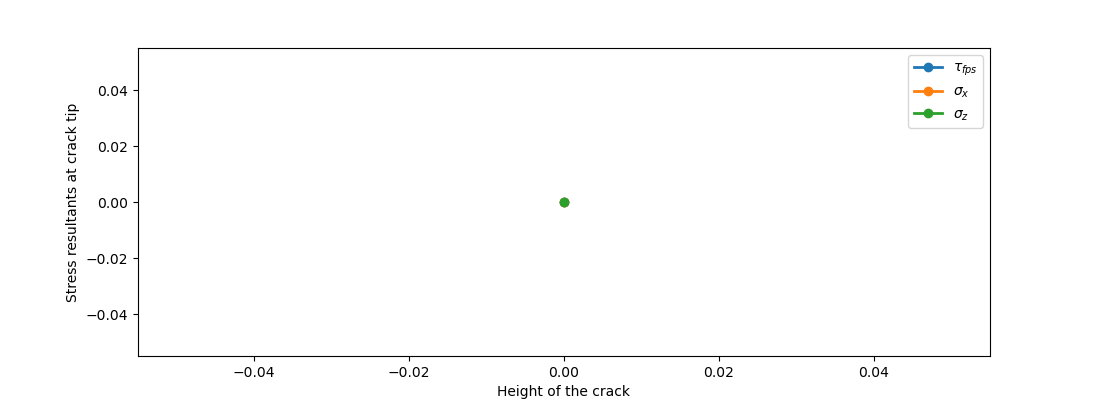

In [6]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

ax1.plot(ce.x_tip_1k, ce.tau_x_tip_1k, 'o-', lw= 2, label = r'$\tau_{fps}$');
ax1.plot(ce.x_tip_1k,  ce.sig_x_tip_0, 'o-', lw= 2, label = r'$\sigma_{x}$');
ax1.plot(ce.x_tip_1k,  ce.sig_z1, 'o-',  lw= 2, label = r'$\sigma_{z}$');
ax1.set_xlabel('Height of the crack'); ax1.set_ylabel('Stress resultants at crack tip');
#ce.x_tip_1k
ax1.legend()

In [7]:
ce.R_n #* 180/np.pi

[]

In [8]:
np.max(ce.F_N_delta), np.max(ce.F_beam), np.argmax(ce.F_N_delta), np.argmax(ce.F_beam), ce.F_N_delta[64]

AttributeError: 'CrackPropagation' object has no attribute 'F_N_delta'

In [ ]:
ce.v_n[64]

In [ ]:
ce.Q[117], ce.F_N_delta[117]#/4.5

In [ ]:
ce.F_beam[89]

In [ ]:
ce.sig_z1[89]

In [ ]:
ce.crack_tip_shear_stress.M_cantilever

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ax1.plot(ce.x_tip_1n,  ce.sig_x_tip_0, lw= 2, label = r'$\sigma_{x}$');
ax1.plot(ce.x_tip_1n,  ce.tau_x_tip_1k, lw= 2, label = r'$\tau_{fpz}$')
ax1.plot(ce.x_tip_1n,  ce.sig_z1, lw= 2, label = r'$\sigma_{z}$'); 
ax1.set_xlabel(r'$\mathrm{Crack\,Height}\,(mm)$'); ax1.set_ylabel(r'$\mathrm{Stress\,at\,crack\,tip}\,(N/mm)$');
ax1.set_title(r'Stress state at crack tip')
ax1.legend()

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ax1.plot(ce.x_tip_1n,  ce.sig_x_tip_0, lw= 2, label = r'$\sigma_{x}$');
ax1.plot(ce.x_tip_1n,  ce.tau_x_tip_1k, lw= 2, label = r'$\tau_{fpz}$')
ax1.set_xlabel(r'$\mathrm{Crack\,Height}\,(mm)$'); ax1.set_ylabel(r'$\mathrm{Stress\,at\,crack\,tip}\,(N/mm)$');
ax1.set_title(r'Stress state at crack tip')
ax1.legend()

In [ ]:
ce.crack_tip_shear_stress.tau_x_tip_1k

In [ ]:
ce.crack_tip_shear_stress.sig_x_tip_0

In [ ]:
ce.crack_tip_shear_stress.sig_z1

In [ ]:
ce.crack_tip_shear_stress.sig_z1
#ce.crack_tip_shear_stress.tau_x_tip_1k

In [ ]:
ce.sz_stress_profile.M

In [ ]:
ce.sz_stress_profile.F_Na

In [ ]:
ce.sz_stress_profile.M

In [ ]:
2850 / ce.sz_bd.B

In [6]:
import numpy as np
import matplotlib.pylab as plt
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
n =60
ce = CrackPropagation(n_seg=n)
ce.sz_bd.Rectangle = True
ce.sz_bd.matrix='advanced'
ce.sz_bd.matrix_.trait_set(f_t = 0.3 * 38 **(2/3), f_c = 38, d_a = 8, E_c = 28000, L_fps = 3, interlock_factor = 1) 


ce.sz_bd.trait_set(H=350, B=320, L=1395)#(H=600, B=250, L=3850)
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ce.crack_tip_shear_stress.trait_set(L_cs = 300)
ce.sz_cp.sz_ctr.trait_set(ell = 1, L_fps = 3)
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=50, n=5, d_s=16, E = 210000, tau = 16, sig_y = 713, dowel_factor = 1, f_c = 38))




F_beam = []
F_max = []
v_beam = []
for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    F_beam_ = np.array(ce.F_beam) / 1000
    F_max_ = np.max(F_beam_)
    v_beam_ = np.array(ce.v_n)
    F_beam.append(F_beam_)
    v_beam.append(v_beam_)
    F_max.append(F_max_)
    print('**************')
    print(crack_position)
    print(np.max(F_beam))

<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),less_equal(w, 0.14392*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w)),select([greater(w, 0.028*d_a**0.32*f_c**0.18/f_t)], [-0.62*s*(s**2/w**2 + 1)**(-0.25)*select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan)/sqrt(w)], default=nan)], default=nan)
<lambdifygenerated-30>:2: RuntimeWarning: invalid value encountered in sqrt
  return select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan)
<lambdifygenerated-29>:2: RuntimeWarning: o

**************
139.5
61.25977373246319


<lambdifygenerated-29>:2: RuntimeWarning: overflow encountered in multiply
  return select([less(f_c, -35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w),less_equal(w, 0.028*d_a**0.32*f_c**0.18/f_t),less_equal(w, 0.14392*d_a**0.32*f_c**0.18/f_t),True], [-f_c,35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t**2*w,f_t*exp(-35.7142857142857*d_a**(-0.32)*f_c**(-0.18)*f_t*(-0.028*d_a**0.32*f_c**0.18/f_t + w)),select([greater(w, 0.028*d_a**0.32*f_c**0.18/f_t)], [-0.62*s*(s**2/w**2 + 1)**(-0.25)*select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan)/sqrt(w)], default=nan)], default=nan)


**************
279.0
68.91724544901791
**************
418.5
78.76256622744903
**************
558.0
99.53179043375204
**************
697.5
119.43762484251627
**************
837.0
149.29604916768412
**************
976.5
199.05921696082058
**************
1116.0
275.66898179610115
**************
1255.5
551.3379635922023


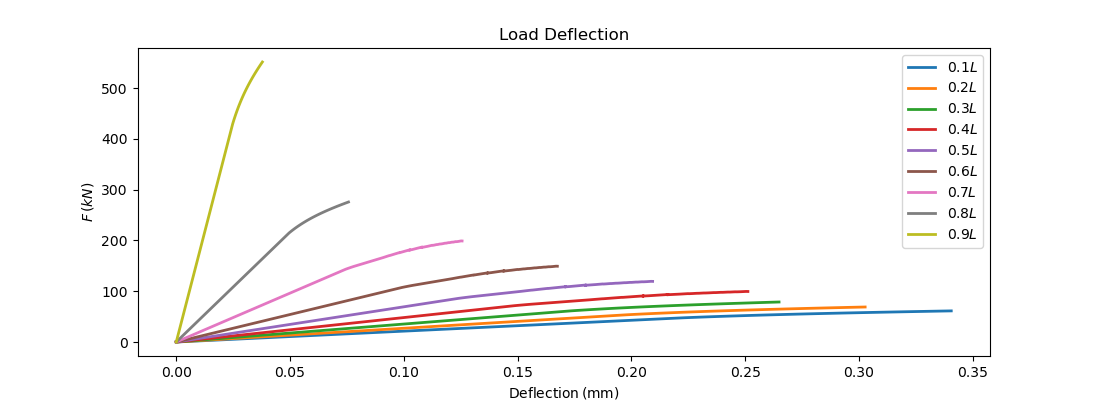

In [7]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))
ax1.plot(v_beam[0],  F_beam[0], lw= 2, label = r'$0.1L$'); #/1000#
ax1.plot(v_beam[1],  F_beam[1], lw= 2, label = r'$0.2L$');
ax1.plot(v_beam[2],  F_beam[2], lw= 2, label = r'$0.3L$');
ax1.plot(v_beam[3],  F_beam[3], lw= 2, label = r'$0.4L$');
ax1.plot(v_beam[4],  F_beam[4], lw= 2, label = r'$0.5L$');
ax1.plot(v_beam[5],  F_beam[5], lw= 2, label = r'$0.6L$');
ax1.plot(v_beam[6],  F_beam[6], lw= 2, label = r'$0.7L$');
ax1.plot(v_beam[7],  F_beam[7], lw= 2, label = r'$0.8L$');
ax1.plot(v_beam[8],  F_beam[8], lw= 2, label = r'$0.9L$');
ax1.set_xlabel(r'$\mathrm{Deflection\,(mm)}$'); ax1.set_ylabel(r'$F\,(kN)$');
ax1.set_title(r'Load Deflection')
ax1.legend()

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (11, 5))
n = 10
ce = CrackPropagation(n_seg=n)
ce.sz_bd.Rectangle = True
ce.sz_bd.matrix='advanced'
ce.sz_bd.matrix_.trait_set(f_t = 0.3 * 33.3 **(2/3), f_c = 33.3, d_a = 16, E_c = 28000, L_fps = 80, interlock_factor = 1) 


ce.sz_bd.trait_set(H=600, B=250, L=3850)
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ce.crack_tip_shear_stress.trait_set(L_cs = 200)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=44, n=2, d_s=28, E = 210000, tau = 16, sig_y = 713, dowel_factor = 1, f_c = 33.3))
ce.sz_bd

x_Ia = []
for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    sz_cp =ce.sz_cp
    x_n_a =sz_cp.x_t_Ia[0,:]
    x_Ia = sz_cp.x_t_Ia
    ds = ce.crack_tip_orientation.crack_tip_shear_stress.sz_stress_profile.ds
    ce.sz_cp.plot_sz0(ax)
    ds.plot_sz1(ax)
    #print(x_Ia)

In [ ]:
import matplotlib.pylab as plt
fig, axes = plt.subplots(1,1, figsize = (15, 6))
n = 145
ce = CrackPropagation(n_seg=n)
ce.sz_bd.Rectangle = True
ce.sz_bd.matrix='advanced'
ce.sz_bd.matrix_.trait_set(f_t = 0.3 * 33.3 **(2/3), f_c = 33.3, d_a = 16, E_c = 28000, L_fps = 80, interlock_factor = 1) 


ce.sz_bd.trait_set(H=600, B=250, L=3850)
crack_position = 0.5 * ce.sz_bd.L
ce.crack_tip_shear_stress.trait_set(L_cs = 200)
ce.sz_cp.sz_ctr.L_fps = 80
ce.sz_cp.sz_ctr.trait_set(ell = 2)
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=44, n=2, d_s=28, E = 210000, tau = 16, sig_y = 713, dowel_factor = 1, f_c = 33.3))
ce.sz_bd

ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.run()
fig.clf()
axes = ce.sz_stress_profile.subplots(fig)
ce.sz_stress_profile.update_plot(axes)
ax_u_0, ax_w_0, ax_S_0, ax_F_0, ax_u_1, ax_w_1, ax_S_1, ax_F_1 = axes

In [ ]:
%matplotlib widget  
import numpy as np
import bmcs_utils.api as bu
from bmcs_cross_section.api import ReinfLayer
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
ce = CrackPropagation(n_seg=144)
ce.sz_bd.Rectangle = True
ce.sz_bd.matrix='advanced'
ce.sz_bd.matrix_.trait_set(f_t = 0.3 * 33.3 **(2/3), f_c = 33.3, d_a = 16, E_c = 28000, L_fps = 80, interlock_factor = 1) 

ce.sz_bd.trait_set(H=600, B=250, L=3850)
#ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.1, n_m = 12)
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 9)
ce.crack_tip_shear_stress.trait_set(L_cs = 200)
#ce.sz_cp.sz_ctr.L_fps = 50
ce.sz_cp.sz_ctr.trait_set(ell = 2, L_fps = 80)
ce.sz_bd.csl.add_layer(CrackBridgeAdv(z=44, n=2, d_s=28, E = 210000, tau = 16, sig_y = 713, dowel_factor = 1, f_c = 33.3))

F_max = []
F_max_i = []
M = []

for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    
    F_beam = ce.F_beam
    F_max_ = np.max(F_beam)
    F_max_i_ = np.argmax(F_beam)
    F_max_i_int = np.array(F_max_i_)
    M_ = ce.M[F_max_i_int]
    
    F_max.append(F_max_)
    F_max_i.append(F_max_i_)
    M.append(M_)
    
print('M',  M)

In [ ]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(9,4))
ax1.plot(crack_positions ,  M, lw= 2, label = r'$M$');

In [ ]:
np.sum(np.array([1,2,5]))